# London Crime Data Analysis (College Assignment )


Import dependencies

In [2]:
import numpy as np
import urllib.request, json 
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers
pio.renderers.default = "svg"
%matplotlib inline

# Data Identification
For this project I used a UK crime data API available at https://data.police.uk. This API gives access to data on all street level crimes, from antisolical behaviour offences to possesion of weapons. The API provides a custom area request option where you can request a record of all crimes in a specific area based of a set of longitude and latitude coordinates. For this project I decided to alalyse crime from the year 2018, recorded in the London area within the M25 motorway shown in the image below:
<img src="London_coor.PNG" style="width:300px;height:200px"/>

This API no longer requires authentication however, there are a number call limits I must adhere to ensure successful requests. If the custom area contains more than 10,000 crimes, The API will return a 503 error code. Given the amount of crime in London, I decided to divide my custom area into 50 subsections and request the crimes for each subsection, each month of 2018 to capture all data successfully. An example custom area http request is as follows:
https://data.police.uk/api/crimes-street/all-crime?poly=51.25,-0.560:51.25,0.280:51.26,-0.560:51.26,-0.280:&date=2018-01



# Data Collection
The data is requested month by month and request is sent for all 50 subsections each month, giving a total of 600 requests. The data is retrieved in json format. I parse the important information(category, month, latitude ,longitude) from the json and write it row by row to a csv file for storage. Once all data is sucessfully retrieved, parsed and stored, I can simply read it back into the environment using pandas.read_csv().  

In [3]:
lats = np.arange(51.25, 51.75, 0.01)       # create 50 latitude values representing the subsection boundaries.
lats = ["%.3f" % lat for lat in lats]      # convert to strings for url endpoint concatenation 
dates = ["%.2d" % i for i in range(1,13)]  # create a list of each month 

In [ ]:
'''with open('London_crime_data_2018.csv','w',newline='') as f:        # Open csv file to write parsed data to.
    writer = csv.writer(f)
    
    for date in dates:                                                 # Loop through januray to december.
        for i in range(0,len(lats)-1):                                 # Loop through each subsection.
            url = "https://data.police.uk/api/crimes-street/all-crime?poly="+lats[i]+",-0.560:"+lats[i]+",0.280:"+lats[i+1]+",-0.560:"+lats[i+1]+",-0.280:"+"&date=2018-"+date
            response = urllib.request.urlopen(url)
            data = json.loads(response.read())
            for j in range(0,len(data)):
                writer.writerow([data[j]["category"],data[j]["month"],data[j]["location"]["latitude"],data[j]["location"]["longitude"]])
'''  

# Data Preparation and Visualisation
Here we can see the head of the dataframe and the 4 features I decided to extract.

In [4]:
# Read in data from csv file and set appropriate column headers.
all_crime_df = pd.read_csv('London_crime_data_2018.csv',names=["category","date","latitude","longitude"])
saved_df = all_crime_df
all_crime_df.head()

,category,date,latitude,longitude
0,anti-social-behaviour,2018-01,51.254920,-0.154996
1,anti-social-behaviour,2018-01,51.250471,-0.003851
2,anti-social-behaviour,2018-01,51.251451,-0.268742
3,anti-social-behaviour,2018-01,51.251684,-0.152818
4,anti-social-behaviour,2018-01,51.250684,-0.058224


A quick check confirms no missing values in this dataset

In [5]:
all_crime_df.isnull().sum()

category     0
date         0
latitude     0
longitude    0
dtype: int64

Counting crimes by category we can display a visual representaion of crime frequencies using a pie chart   

There are 14 crime categories.

violent-crime            125102
anti-social-behaviour    122169
other-theft               64376
vehicle-crime             58631
burglary                  43013
criminal-damage-arson     32789
public-order              29817
shoplifting               27205
theft-from-the-person     25494
drugs                     18024
robbery                   16177
bicycle-theft             11694
other-crime                6666
possession-of-weapons      4308
Name: category, dtype: int64


Text(0, 0.5, ' ')

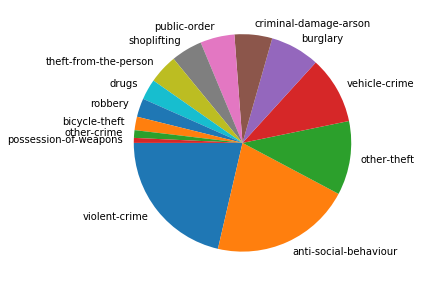

In [6]:
category_counts = all_crime_df["category"].value_counts()
print("There are " + str(category_counts.size) + " crime categories.\n")
print(category_counts)
category_counts.plot.pie(subplots=True,figsize=(5, 5),startangle=180)
plt.ylabel(" ")

The horizontal bar chart shown belows allows for better comparison between crime categories.

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Number of Crimes'),
 Text(0.5, 1.0, 'Number of crimes per category')]

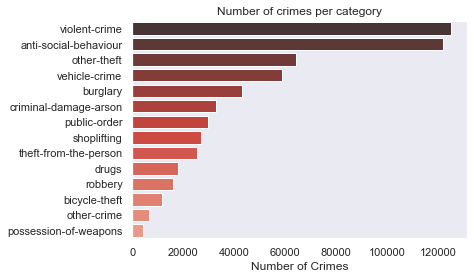

In [7]:
sns.set(style="dark", color_codes=True)
crimes_palette = sns.color_palette("Reds_d", len(category_counts))
rank = category_counts.argsort()
all_crimes_bar = sns.barplot(x=category_counts, y=category_counts.index, palette=np.array(crimes_palette[::-1])[rank])
all_crimes_bar.set(xlabel='Number of Crimes', ylabel='', title = 'Number of crimes per category')

Next i'll create a new dataframe called dates_df, storing the number of crimes in each category for all months of 2018.

In [8]:
category_column = all_crime_df["category"].unique()
dates_df = pd.DataFrame(columns = category_column)  # create new dataframe with crime categories as column headers
months = all_crime_df["date"].unique()              # find all unique months 

for month in range(len(months)):                                   # Loop through all months of the year
    temp_df = all_crime_df[all_crime_df["date"] == months[month]]  # find enties for each specific month 
    temp_counts = temp_df["category"].value_counts()               # count the number of crimes in each category
    dates_df = dates_df.append(temp_counts)                        # append this month to dates_df 
    
dates_df["date"] = months 
dates_df = dates_df.set_index("date")                              # set the months as the dataframe index 
dates_df['Total'] = dates_df.sum(axis=1)                           # add a total column.
dates_df


,anti-social-behaviour,burglary,criminal-damage-arson,drugs,other-theft,public-order,vehicle-crime,violent-crime,other-crime,possession-of-weapons,robbery,shoplifting,bicycle-theft,theft-from-the-person,Total
date,,,,,,,,,,,,,,,
2018-01,8838,3935,2890,1624,4970,2244,4906,9750,589,359,1350,2452,731,2126,46764.0
2018-02,8063,3564,2490,1411,4696,2150,4665,8740,492,363,1198,2300,633,2095,42860.0
2018-03,9061,3477,2671,1413,5065,2472,4756,10040,580,383,1303,2385,609,2203,46418.0
2018-04,10903,3437,2709,1481,4915,2447,4673,9902,520,401,1224,2371,776,1902,47661.0
2018-05,10541,3484,2932,1548,5290,2743,4639,11201,589,381,1332,2375,1075,1859,49989.0
2018-06,10861,3274,2733,1310,5062,2673,4595,11210,575,329,1406,2182,1137,2066,49413.0
2018-07,12017,3387,3004,1290,5777,2974,4695,12054,553,306,1470,2164,1418,2120,53229.0
2018-08,11047,3451,2597,1645,5339,2426,4731,10235,553,301,1201,2211,1268,1902,48907.0
2018-09,9855,3214,2598,1493,5372,2458,5030,10402,543,304,1338,2137,1273,1741,47758.0


The time series graph below displays the number of crimes in each category over time in 2018. For most categories, the number of crimes seems to increase slightly during the summer months with anti-social-behaviour offences increasing significantly perhaps due to increased alcohol consumption and more time off for younger people.

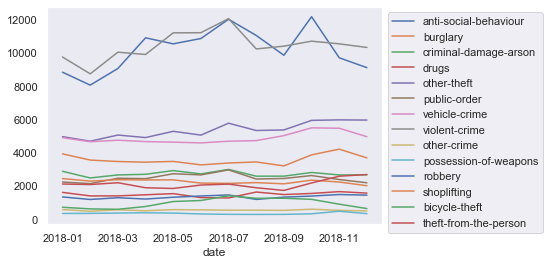

In [9]:
dates_df.plot(y=category_column, kind = 'line')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

To get an idea of the total crime rate over time we can look at the total crimes per month column seperatly

Text(0, 0.5, 'Number of crimes')

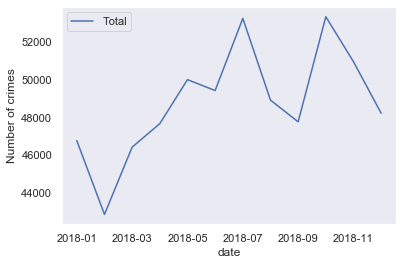

In [10]:
dates_df.plot(y="Total", kind = 'line')
plt.ylabel("Number of crimes")

# Heat Maps

Heat maps allow us to visualise the density of crime categories in the greater London area. Lets have a look at geographical breakdown of some categories.

Looking at the breakdown of violent crime may give an indication of the saftest places to live in London. According to an article posted by theresident.co.uk, Richmond(south-west) and Bexley(south-east) were the top two safest places to live in London. These two locations have evidently lower crime rates looking at the heat map below.

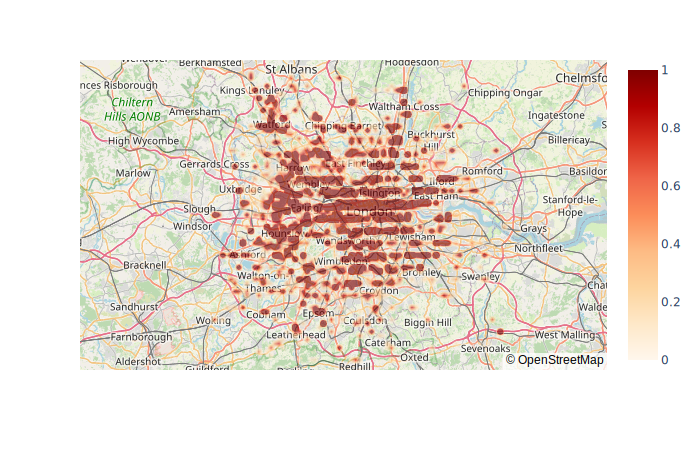

In [12]:
violent_crime_df =  all_crime_df[all_crime_df["category"] == "violent-crime"]
fig_map = px.density_mapbox(violent_crime_df,
                            lat="latitude",
                            lon="longitude",
                            color_continuous_scale='OrRd',
                            opacity=0.6,
                            radius=1,
                            height = 500,
                            width = 700,
                            zoom = 8,
                            center={'lon': -0.20, 'lat': 51.5},
                           )

fig_map.update_layout(
            mapbox_style='open-street-map',
        )

For possesssion of weapons crimes, we once again see crime density highest in the center on London as expected, with suburban towns such as Watford, Hounslow and Croyden seeing a considerable amount. Looking into the heatmap of drug crimes we can see similar patterns to that of possesion of weapons. This may indicate some correlation between the categories or may simply just be a symptom of denser areas leading to higher crime rates 

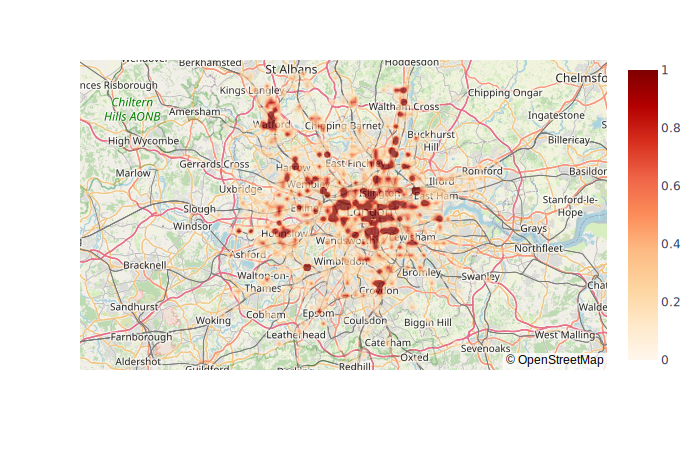

In [13]:
weapons_df =  all_crime_df[all_crime_df["category"] == "possession-of-weapons"]
fig_map = px.density_mapbox(weapons_df,
                            lat="latitude",
                            lon="longitude",
                            color_continuous_scale='OrRd',
                            opacity=0.7,
                            radius=3,
                            height = 500,
                            width = 700,
                            zoom = 8,
                            center={'lon': -0.20, 'lat': 51.5}
                           )

fig_map.update_layout(
            mapbox_style='open-street-map',
        )

Looking at the theft from person crime category, the majority of crimes took place in central London. Zooming is we can see the area around Picadilly Circus and westminister is most heavily effected. The dense streets flooding with tourists in this area make it a perfect place for petty theft such as pickpocketing. 

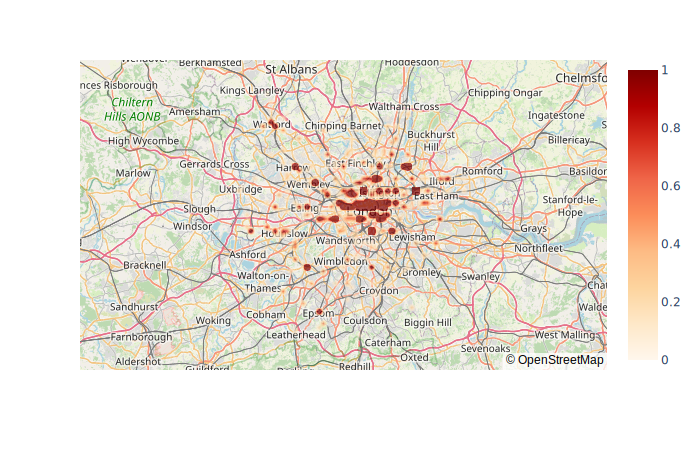

In [14]:
person_df =  all_crime_df[all_crime_df["category"] == "theft-from-the-person"]
fig_map = px.density_mapbox(person_df,
                            lat="latitude",
                            lon="longitude",
                            color_continuous_scale='OrRd',
                            opacity=0.7,
                            radius=1,
                            height = 500,
                            width = 700,
                            zoom = 8,
                            center={'lon': -0.20, 'lat': 51.5}
                           )

fig_map.update_layout(
            mapbox_style='open-street-map',
        )